In [2]:
!pip install torch
!pip install torch.nn
!pip install torch.optim
!pip install pandas 
!pip install numpy

ERROR: Could not find a version that satisfies the requirement torch.nn (from versions: none)
ERROR: No matching distribution found for torch.nn


In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

In [ ]:
# Need to turn dataset into numpy array

import pandas as pd
import torch

# Example DataFrame
df1 = pd.read_csv("model_features.csv")

In [22]:
df1.columns

Index(['nadac_per_unit', 'otc', 'year', 'package_size', 'units_reimbursed',
       'number_of_prescriptions', 'total_amount_reimbursed',
       'medicaid_amount_reimbursed', 'non_medicaid_amount_reimbursed',
       'SUBSTANCENAME', 'month', 'day', 'classification_for_rate_B',
       'classification_for_rate_B-ANDA', 'classification_for_rate_B-BIO',
       'classification_for_rate_G', 'pricing_EA', 'pricing_GM', 'pricing_ML',
       'marketing_category_ANDA', 'marketing_category_BLA',
       'marketing_category_NDA', 'marketing_category_NDA AUTHORIZED GENERIC',
       'marketing_category_OTC MONOGRAPH DRUG',
       'marketing_category_OTC MONOGRAPH FINAL',
       'marketing_category_OTC MONOGRAPH NOT FINAL',
       'marketing_category_UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE',
       'marketing_category_UNAPPROVED DRUG OTHER',
       'marketing_category_UNAPPROVED HOMEOPATHIC', 'EPCembed', 'CSembed',
       'PEembed', 'MoAembed', 'EXTembed', 'ndc_desc_emb', 'days_in_market'],
      dtyp

In [23]:
def convert_str_to_array(embedding_str):
    if isinstance(embedding_str, str):
        # Remove brackets and split the string by spaces
        values = embedding_str.strip('[]').split()
        # Convert the list of strings to a NumPy array of floats
        return np.array(values, dtype=float)
    else:
        return embedding_str
    
df1['EPCembed'] = df1['EPCembed'].apply(convert_str_to_array)
df1['CSembed'] = df1['CSembed'].apply(convert_str_to_array)
df1['MoAembed'] = df1['MoAembed'].apply(convert_str_to_array)
df1['EXTembed'] = df1['EXTembed'].apply(convert_str_to_array)
df1['PEembed'] = df1['PEembed'].apply(convert_str_to_array)
df1['ndc_desc_emb'] = df1['ndc_desc_emb'].apply(convert_str_to_array)
df1['SUBSTANCENAME'] = df1['SUBSTANCENAME'].apply(convert_str_to_array)

In [24]:
zero_array = np.zeros(384, dtype=float)
cols_to_replace = ['SUBSTANCENAME', 'EPCembed', 'CSembed', 'PEembed', 'MoAembed',
       'EXTembed', 'ndc_desc_emb']

for col in cols_to_replace:
    df1[col] = df1[col].apply(lambda x: zero_array if x is None or not isinstance(x, np.ndarray) else x)

df1.select_dtypes(include='object')

,SUBSTANCENAME,EPCembed,CSembed,PEembed,MoAembed,EXTembed,ndc_desc_emb
0,"[0.00947810989, -0.0427927077, -0.0657144114, ...","[-0.0330387093, 0.00667294022, -0.0219613314, ...","[-0.0434587672, -0.0121431332, -0.028138781, 0...","[0.0263711698, 0.0210511871, -0.000197666988, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0643877834, 0.0240811873, 0.0258140061, 0...."
1,"[-0.0710003898, 0.0205655415, -0.0771593302, 0...","[-0.0503016114, 0.030173745, -0.0395656079, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0291348379, -0.0886728168, 0.0689277053, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0797675028, 0.0876037478, -0.0634495318, -..."
2,"[-0.0284579955, -0.0422791913, 0.0327109359, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0426063314, 0.0858338103, -0.0933608338, -..."
3,"[-0.0284579955, -0.0422791913, 0.0327109359, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0426063314, 0.0858338103, -0.0933608338, -..."
4,"[-0.102597177, -0.00665915385, -0.0660863444, ...","[-0.00991146825, 0.00558032654, -0.0200001523,...","[0.0139763737, 0.0225846004, -0.0693783239, -0...","[-0.0179691091, 0.0101037268, -0.0270781051, -...","[-0.0778129324, 0.0416403189, -0.107955232, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0350452214, 0.0159691423, -0.0532589108, -0..."
...,...,...,...,...,...,...,...
20006,"[-0.0365421437, 0.0327461362, -0.0452398807, 0...","[-0.0581455044, -0.0610000156, -0.0517241918, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0977902487, -0.0328938439, -0.0108143296, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0599474348, 0.0651338175, -0.0638899133, -0..."
20007,"[0.0096176276, -0.0109207202, -0.0724421293, -...","[-0.0526543744, 0.0359036885, -0.0297262836, 0...","[-0.0530931987, 0.0205363072, -0.0440637209, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0738809258, 0.0104536125, -0.0661890134, -0..."
20008,"[0.0096176276, -0.0109207202, -0.0724421293, -...","[-0.0526543744, 0.0359036885, -0.0297262836, 0...","[-0.0530931987, 0.0205363072, -0.0440637209, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0551701784, 0.0176252592, -0.0606536753, -0..."
20009,"[0.0096176276, -0.0109207202, -0.0724421293, -...","[-0.0526543744, 0.0359036885, -0.0297262836, 0...","[-0.0530931987, 0.0205363072, -0.0440637209, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0429866724, 0.029119378, -0.0934192836, -0...."


In [25]:
df1.drop(['PEembed', 'CSembed', 'ndc_desc_emb'],axis=1, inplace=True)
df1.select_dtypes(include='object').columns
df1.columns

Index(['nadac_per_unit', 'otc', 'year', 'package_size', 'units_reimbursed',
       'number_of_prescriptions', 'total_amount_reimbursed',
       'medicaid_amount_reimbursed', 'non_medicaid_amount_reimbursed',
       'SUBSTANCENAME', 'month', 'day', 'classification_for_rate_B',
       'classification_for_rate_B-ANDA', 'classification_for_rate_B-BIO',
       'classification_for_rate_G', 'pricing_EA', 'pricing_GM', 'pricing_ML',
       'marketing_category_ANDA', 'marketing_category_BLA',
       'marketing_category_NDA', 'marketing_category_NDA AUTHORIZED GENERIC',
       'marketing_category_OTC MONOGRAPH DRUG',
       'marketing_category_OTC MONOGRAPH FINAL',
       'marketing_category_OTC MONOGRAPH NOT FINAL',
       'marketing_category_UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE',
       'marketing_category_UNAPPROVED DRUG OTHER',
       'marketing_category_UNAPPROVED HOMEOPATHIC', 'EPCembed', 'MoAembed',
       'EXTembed', 'days_in_market'],
      dtype='object')

In [26]:
df1.select_dtypes(include='object').columns

Index(['SUBSTANCENAME', 'EPCembed', 'MoAembed', 'EXTembed'], dtype='object')

In [27]:
columns_to_expand = ['SUBSTANCENAME', 'EPCembed', 'MoAembed', 'EXTembed']
# Expand each array column
expanded_columns = []
for col in columns_to_expand:
    expanded_df = pd.DataFrame(df1[col].tolist(), columns=[f"{col}_{i}" for i in range(384)])
    expanded_columns.append(expanded_df)

# Combine expanded columns with the original DataFrame
df_expanded = pd.concat([df1.drop(columns=columns_to_expand)] + expanded_columns, axis=1)

# Resulting DataFrame
df_expanded.drop(['year', 'month', 'day', 'nadac_per_unit'], axis=1, inplace=True)

In [28]:
# Features and target
X = df_expanded.to_numpy() # Convert to NumPy array
y = df1['nadac_per_unit'].to_frame().to_numpy()

#Scaling
from sklearn.preprocessing import StandardScaler

# Normalize features (X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

y_mean = y.mean()
y_std = y.std()
y_normalized = (y - y_mean) / y_std

# # Convert to PyTorch tensors (if using PyTorch)
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

In [29]:
#Create class for perceptron object
class Perceptron2L(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Perceptron2L, self).__init__() #Makes sure Perceptron2L inherits initialization of nn.Module
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.hidden_output = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU() # Activation function
        self.output_activation = nn.Softplus()
    
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden_output(x)
        x = self.output_activation(x)
        return x 

In [ ]:
!pip install sklearn
import sklearn.model_selection

In [ ]:
df_expanded.columns

Epoch 1/30, Train Loss: 0.8533, Val Loss: 0.8873
Epoch 2/30, Train Loss: 0.6155, Val Loss: 0.5586
Epoch 3/30, Train Loss: 0.5113, Val Loss: 0.4426
Epoch 4/30, Train Loss: 0.2133, Val Loss: 0.3855
Epoch 5/30, Train Loss: 0.2373, Val Loss: 0.4467
Epoch 6/30, Train Loss: 0.2472, Val Loss: 0.4195
Epoch 7/30, Train Loss: 0.2181, Val Loss: 0.4111
Epoch 8/30, Train Loss: 0.2163, Val Loss: 0.3825
Epoch 9/30, Train Loss: 0.2185, Val Loss: 0.3272
Epoch 10/30, Train Loss: 0.2013, Val Loss: 0.3427
Epoch 11/30, Train Loss: 0.2110, Val Loss: 0.2890
Epoch 12/30, Train Loss: 0.2129, Val Loss: 0.3628
Epoch 13/30, Train Loss: 0.2193, Val Loss: 0.3099
Epoch 14/30, Train Loss: 0.1953, Val Loss: 0.2980
Epoch 15/30, Train Loss: 0.1972, Val Loss: 0.1950
Epoch 16/30, Train Loss: 0.1992, Val Loss: 0.2807
Epoch 17/30, Train Loss: 0.1591, Val Loss: 0.4204
Epoch 18/30, Train Loss: 0.1620, Val Loss: 0.2622
Epoch 19/30, Train Loss: 0.2239, Val Loss: 0.2203
Epoch 20/30, Train Loss: 0.1914, Val Loss: 0.3682
Epoch 21/

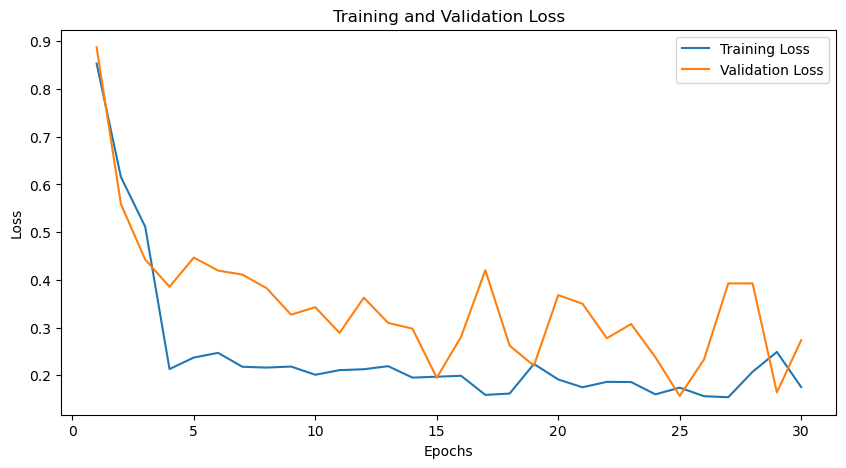

In [34]:
#training code: 
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X = X_tensor
y = y_tensor
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size =0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

train_set = TensorDataset(X_train, y_train)
val_set = TensorDataset(X_val, y_val)
test_set = TensorDataset(X_test, y_test)

batch_size=64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

input_size = X.shape[1] #adjust to correct
hidden_size1 = input_size
hidden_size2 = input_size//2
output_size = 1

model = Perceptron2L(input_size, hidden_size1, hidden_size2, output_size)
def initialize_weights(layer):
    if isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)  # Xavier initialization for weights
        nn.init.zeros_(layer.bias)
model.apply(initialize_weights)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.0001)

#Training
num_epochs = 30
train_losses=[]
val_losses = []
unnormalized_train_losses = []
unnormalized_val_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    unnormalized_train_loss = 0
    for batch_X, batch_y in train_loader: 
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)

        outputs_unnorm = outputs.detach() * y_std + y_mean
        batch_y_unnorm = batch_y.detach() * y_std + y_mean
        unnormalized_loss = mean_squared_error(outputs_unnorm, batch_y_unnorm)
        unnormalized_train_loss += unnormalized_loss * batch_X.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    unnormalized_val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)  # Accumulate total loss

              # Calculate unnormalized loss
            outputs_unnorm = outputs.detach() * y_std + y_mean
            batch_y_unnorm = batch_y.detach() * y_std + y_mean
            unnormalized_loss = mean_squared_error(outputs_unnorm, batch_y_unnorm)
            unnormalized_val_loss += unnormalized_loss * batch_X.size(0)

    val_loss /= len(val_loader.dataset)  # Average loss for the epoch
    unnormalized_val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    unnormalized_val_losses.append(unnormalized_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
unnormalized_val_losses[-1]/X.shape[0]


0.6405036125849455

In [35]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Check if GPU (CUDA) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'model' is already trained and 'test_loader' is your test DataLoader

# Move the model to the appropriate device (GPU or CPU)
model.to(device)

# Set the model to evaluation mode (disables dropout, batchnorm)
model.eval()

# Store predictions and true labels for calculating metrics
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation for efficiency
    for inputs, labels in test_loader:
        # Move data to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass: Get model predictions
        outputs = model(inputs)

        # Store the predictions and labels
        all_preds.append(outputs.cpu().numpy())  # Move to CPU for metric calculation
        all_labels.append(labels.cpu().numpy())  # Move to CPU for metric calculation

# Flatten the list of predictions and labels
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

all_preds = (all_preds * y_std) + y_mean
all_labels = (all_labels * y_std) + y_mean

# Combine predictions and labels side by side
comparison = np.column_stack((all_preds, all_labels))

rmse = np.sqrt(mean_squared_error(all_labels, all_preds))
print(f"Test RMSE: {rmse:.4f}")

r2 = r2_score(all_labels, all_preds)
print(f"R^2: {r2:.4f}")

# Print the combined array
print("Predictions vs True Labels:")
print("Prediction\tTrue Label")
for pred, label in comparison:
    print(f"{pred:.4f}\t\t{label:.4f}")



Test RMSE: 194.8519
R^2: 0.7135
Predictions vs True Labels:
Prediction	True Label
16.3011		4.2154
16.3011		0.1636
16.3040		0.0238
16.3028		0.1926
16.3058		0.0800
16.3023		0.5776
16.3014		3.0590
16.3184		10.9052
16.3011		0.0540
16.3011		0.4098
16.3011		12.7896
16.3011		0.2468
16.3019		1.9898
16.3011		29.6580
16.3011		0.4212
16.3020		12.3977
16.3011		1.2543
16.3012		0.1287
16.3027		0.0287
16.3011		0.9474
19.9115		3.3254
23.2370		0.2857
16.3223		10.9052
16.3012		1.7654
16.3011		0.1951
16.3067		0.0753
16.3011		0.0654
16.3058		0.0270
16.3011		1.6001
16.3348		3.2020
16.3011		0.3131
16.3011		0.0516
16.3011		2.9777
23.7573		69.7828
16.3011		0.0280
16.3011		0.1873
16.3011		0.0146
16.3011		0.5866
16.3011		0.0131
16.3011		0.4203
16.3011		2.2203
16.3022		1.3370
16.3011		1.6188
16.3011		0.1032
16.3011		0.0810
16.3011		0.2861
16.3011		0.3141
16.3185		3.6358
16.3011		0.2912
16.3016		14.6431
16.3011		0.2590
16.3160		0.4317
16.3011		5.7559
16.3011		0.7153
16.3011		0.3131
16.3011		0.5393
16.3037		0.0842

In [58]:
values_greater_than_100 = [x for x in all_labels if x > 0 and x < 5]
len(values_greater_than_100)


3511

In [132]:
#PCA Approach
df1.columns


Index(['otc', 'year', 'package_size', 'units_reimbursed',
       'number_of_prescriptions', 'total_amount_reimbursed',
       'medicaid_amount_reimbursed', 'non_medicaid_amount_reimbursed',
       'SUBSTANCENAME', 'month', 'day', 'classification_for_rate_B',
       'classification_for_rate_B-ANDA', 'classification_for_rate_B-BIO',
       'classification_for_rate_G', 'pricing_EA', 'pricing_GM', 'pricing_ML',
       'marketing_category_ANDA', 'marketing_category_BLA',
       'marketing_category_NDA', 'marketing_category_NDA AUTHORIZED GENERIC',
       'marketing_category_OTC MONOGRAPH DRUG',
       'marketing_category_OTC MONOGRAPH FINAL',
       'marketing_category_OTC MONOGRAPH NOT FINAL',
       'marketing_category_UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE',
       'marketing_category_UNAPPROVED DRUG OTHER',
       'marketing_category_UNAPPROVED HOMEOPATHIC', 'EPCembed', 'MoAembed',
       'EXTembed', 'days_in_market'],
      dtype='object')

In [154]:
cols = list(df1.select_dtypes(include='object').columns)
cols

['SUBSTANCENAME',
 'EPCembed',
 'CSembed',
 'PEembed',
 'MoAembed',
 'EXTembed',
 'ndc_desc_emb']

In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for col in cols:
    embeddings = np.stack(df1[col].to_numpy())
    scaler = StandardScaler()
    embeddings_scaled = scaler.fit_transform(embeddings)

    #apply PCA
    pca = PCA(n_components=20)
    embeddings_pca = pca.fit_transform(embeddings_scaled)

    df1[col] = list(embeddings_pca)

In [156]:
df1.select_dtypes(include='object').columns
df1

,otc,year,package_size,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,SUBSTANCENAME,month,...,marketing_category_UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE,marketing_category_UNAPPROVED DRUG OTHER,marketing_category_UNAPPROVED HOMEOPATHIC,EPCembed,CSembed,PEembed,MoAembed,EXTembed,ndc_desc_emb,days_in_market
0,0,2024,60,11012.0,180,312410.53,290516.00,21894.53,"[0.07610362447504486, -0.43194288728924546, 1....",9,...,0,0,0,"[0.6597621231940695, -0.4342719425238212, -0.9...","[9.785335946640338, -6.445753990986106, -4.363...","[9.30632562308401, 0.6591547682674715, 11.3537...","[-0.0010849762414488226, 0.002006219217180084,...","[120.70493953825623, -18.68217981809297, -76.6...","[1.1814171256596482, 2.359832653265055, -3.509...",2438
1,0,2022,75,1022.0,183,3242.93,3226.72,16.21,"[0.09236699780262952, 0.9684218352386825, -0.5...",2,...,0,0,0,"[-0.03122484434537485, 0.13964224580462872, 0....","[-5.3760255002368975, 0.09423444805611732, 0.0...","[15.585023591312492, -0.6770561769973674, 12.7...","[-0.0010849762409077847, 0.0020062192162712375...","[-11.177311181939128, 93.75552367404484, -48.6...","[-4.859804109429839, -1.2603054389751331, -0.8...",2513
2,0,2019,1,211969.0,6167,22643.53,21684.04,959.49,"[-0.4175617490613288, -0.5595684108931814, -1....",12,...,0,0,0,"[0.036043060987967994, -0.14196305405930595, -...","[-5.376025500236894, 0.09423444805607044, 0.00...","[-4.435545358411362, -1.6894495060104193, -0.2...","[-0.0010849762414906557, 0.0020062192174596636...","[63.953465912884674, -44.98355649716327, 77.24...","[3.470607942416269, 3.9589853279782248, 6.1148...",2153
3,0,2019,5,2393477.0,61521,285542.60,278197.21,7345.39,"[-0.41756174906136323, -0.5595684108931714, -1...",12,...,0,0,0,"[0.03604306098787837, -0.14196305405928963, -0...","[-5.376025500236895, 0.09423444805607144, 0.00...","[-4.435545358411363, -1.689449506010407, -0.28...","[-0.0010849762412234688, 0.0020062192168235453...","[-4.154999545459914, 2.8962694865622893, 4.228...","[3.470607942416268, 3.9589853279782163, 6.1148...",2153
4,0,2019,1,2589373.0,36643,1797460.34,1747856.31,49604.03,"[-0.5642751190873398, 1.1130191407863952, -0.1...",12,...,0,0,0,"[0.20249149090020674, 0.688080110356438, 1.362...","[15.429510481845526, 27.900976162341525, 0.980...","[4.326965872870521, 15.692318200176809, -5.590...","[1.2572972155938924, 0.6063895299432295, -0.37...","[7.890110293461776, 12.461607636751612, 9.9171...","[-3.584872949746976, -0.6716648121587535, -3.7...",4965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,0,2024,10,17.0,17,335.72,335.72,0.00,"[-0.5859472745831886, -1.7566845241540103, 0.6...",8,...,0,0,0,"[0.16474107531787324, -0.26886733477757296, -0...","[-5.376025500236895, 0.0942344480560711, 0.008...","[-4.435545358411362, -1.6894495060104129, -0.2...","[0.8175387562543229, -0.34110175035229623, 2.2...","[-7.925158180878724, -13.11701252656819, -9.71...","[2.531872077879073, 1.1215103029142504, -1.370...",279
20007,0,2022,1,2402.0,36,4476.00,4475.00,1.00,"[0.7609343944491412, -0.024912852696310224, -0...",4,...,0,0,0,"[0.2837886412745892, 0.6487650208468728, -0.79...","[17.88104387646551, -8.511187074056622, 10.921...","[-4.435545358411362, -1.6894495060104129, -0.2...","[-0.0010849762413327512, 0.002006219217203837,...","[-7.925158180878724, -13.11701252656819, -9.71...","[-3.9568495465693423, -1.3021425480889595, -2....",1067
20008,0,2022,1,585.0,11,1158.57,1158.57,0.00,"[0.7609343944491412, -0.024912852696310137, -0...",4,...,0,0,0,"[0.28378864127458925, 0.6487650208468725, -0.7...","[17.88104387646551, -8.511187074056622, 10.921...","[-4.435545358411362, -1.6894495060104129, -0.2...","[-0.001084976241332751, 0.0020062192172038366,...","[-7.925158180878725, -13.117012526568192, -9.7...","[-4.954936097000854, -0.8318532774706616, -2.4...",1067
20009,0,2022,1,3350.0,56,7713.98,7484.28,229.70,"[0.7609343944491412, -0.0249128526

In [157]:
columns_to_expand = ['SUBSTANCENAME', 'EPCembed', 'CSembed', 'PEembed', 'MoAembed',
       'EXTembed', 'ndc_desc_emb']

# Expand each array column
expanded_columns = []
for col in columns_to_expand:
    expanded_df = pd.DataFrame(df1[col].tolist(), columns=[f"{col}_{i}" for i in range(20)])
    expanded_columns.append(expanded_df)

# Combine expanded columns with the original DataFrame
df_expanded = pd.concat([df1.drop(columns=columns_to_expand)] + expanded_columns, axis=1)

# Resulting DataFrame
df_expanded.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [167]:
df_expanded['nadac_per_unit']=list(df2['nadac_per_unit'])
df_expanded.to_csv('features_PCA.csv')

In [160]:
# Features and target
X = df_expanded.to_numpy() # Convert to NumPy array
y = df2['nadac_per_unit'].to_frame().to_numpy()

#Scaling
from sklearn.preprocessing import StandardScaler

# Normalize features (X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

y_mean = y.mean()
y_std = y.std()
y_normalized = (y - y_mean) / y_std

# # Convert to PyTorch tensors (if using PyTorch)
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

X.shape

(20011, 165)

In [174]:
#Create class for perceptron object
class Perceptron2L(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Perceptron2L, self).__init__() #Makes sure Perceptron2L inherits initialization of nn.Module
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.hidden_output = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU() # Activation function
        self.output_activation = nn.Softplus()
    
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden_output(x)
        x = self.output_activation(x)
        return x 

Epoch 1/50, Train Loss: 0.9452, Val Loss: 0.8807
Epoch 2/50, Train Loss: 0.6967, Val Loss: 0.7988
Epoch 3/50, Train Loss: 0.5027, Val Loss: 0.6148
Epoch 4/50, Train Loss: 0.4081, Val Loss: 0.6150
Epoch 5/50, Train Loss: 0.3128, Val Loss: 0.6504
Epoch 6/50, Train Loss: 0.2517, Val Loss: 0.6285
Epoch 7/50, Train Loss: 0.1922, Val Loss: 0.5501
Epoch 8/50, Train Loss: 0.1572, Val Loss: 0.5561
Epoch 9/50, Train Loss: 0.1284, Val Loss: 0.4978
Epoch 10/50, Train Loss: 0.0949, Val Loss: 0.5306
Epoch 11/50, Train Loss: 0.0695, Val Loss: 0.4908
Epoch 12/50, Train Loss: 0.0555, Val Loss: 0.4833
Epoch 13/50, Train Loss: 0.0437, Val Loss: 0.4329
Epoch 14/50, Train Loss: 0.0350, Val Loss: 0.4157
Epoch 15/50, Train Loss: 0.0287, Val Loss: 0.4023
Epoch 16/50, Train Loss: 0.0249, Val Loss: 0.4334
Epoch 17/50, Train Loss: 0.0235, Val Loss: 0.3771
Epoch 18/50, Train Loss: 0.0196, Val Loss: 0.3921
Epoch 19/50, Train Loss: 0.0185, Val Loss: 0.3519
Epoch 20/50, Train Loss: 0.0162, Val Loss: 0.3769
Epoch 21/

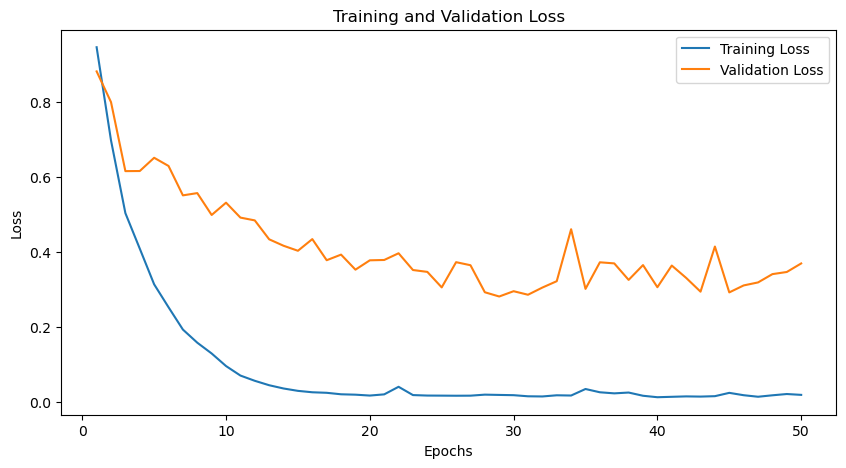

In [162]:
#training code: 
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

X = X_tensor
y = y_tensor
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size =0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

train_set = TensorDataset(X_train, y_train)
val_set = TensorDataset(X_val, y_val)
test_set = TensorDataset(X_test, y_test)

batch_size=64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

input_size = X.shape[1] #adjust to correct
hidden_size1 = 512
hidden_size2 = 256
output_size = 1

model = Perceptron2L(input_size, hidden_size1, hidden_size2, output_size)
def initialize_weights(layer):
    if isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)  # Xavier initialization for weights
        nn.init.zeros_(layer.bias)
model.apply(initialize_weights)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.0001)

#Training
num_epochs = 50
train_losses=[]
val_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader: 
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)  # Accumulate total loss

    val_loss /= len(val_loader.dataset)  # Average loss for the epoch
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [163]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Check if GPU (CUDA) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'model' is already trained and 'test_loader' is your test DataLoader

# Move the model to the appropriate device (GPU or CPU)
model.to(device)

# Set the model to evaluation mode (disables dropout, batchnorm)
model.eval()

# Store predictions and true labels for calculating metrics
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation for efficiency
    for inputs, labels in test_loader:
        # Move data to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass: Get model predictions
        outputs = model(inputs)

        # Store the predictions and labels
        all_preds.append(outputs.cpu().numpy())  # Move to CPU for metric calculation
        all_labels.append(labels.cpu().numpy())  # Move to CPU for metric calculation

# Flatten the list of predictions and labels
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

all_preds = (all_preds * y_std) + y_mean
all_labels = (all_labels * y_std) + y_mean

# Combine predictions and labels side by side
comparison = np.column_stack((all_preds, all_labels))

rmse = np.sqrt(mean_squared_error(all_labels, all_preds))
print(f"Test RMSE: {rmse:.4f}")

r2 = r2_score(all_labels, all_preds)
print(f"R^2: {r2:.4f}")

# Print the combined array
print("Predictions vs True Labels:")
print("Prediction\tTrue Label")
for pred, label in comparison:
    print(f"{pred:.4f}\t\t{label:.4f}")



Test RMSE: 224.7911
R^2: 0.6186
Predictions vs True Labels:
Prediction	True Label
16.3038		4.2154
16.3031		0.1636
16.3089		0.0238
16.3030		0.1926
16.3011		0.0800
16.3023		0.5776
16.3012		3.0590
16.3011		10.9052
16.3231		0.0540
16.3013		0.4098
16.3585		12.7896
16.3011		0.2468
16.3083		1.9898
16.4233		29.6580
16.3018		0.4212
16.3820		12.3977
16.3016		1.2543
16.3011		0.1287
16.3011		0.0287
16.3011		0.9474
16.3031		3.3254
16.3138		0.2857
16.3011		10.9052
16.4682		1.7654
16.3028		0.1951
16.3011		0.0753
16.3011		0.0654
16.3012		0.0270
16.3563		1.6001
16.3011		3.2020
16.3016		0.3131
16.3015		0.0516
16.3017		2.9777
19.3143		69.7828
16.3011		0.0280
16.3014		0.1873
16.3052		0.0146
16.3011		0.5866
16.3015		0.0131
16.3011		0.4203
16.3072		2.2203
16.4341		1.3370
16.3011		1.6188
16.3296		0.1032
16.3011		0.0810
16.3013		0.2861
16.3011		0.3141
16.4043		3.6358
16.3016		0.2912
17.3240		14.6431
16.3013		0.2590
16.3012		0.4317
16.3017		5.7559
16.3011		0.7153
16.3018		0.3131
16.3011		0.5393
16.3011		0.0842

In [171]:
df1.select_dtypes(include='object').columns

Index(['SUBSTANCENAME', 'EPCembed', 'CSembed', 'PEembed', 'MoAembed',
       'EXTembed', 'ndc_desc_emb'],
      dtype='object')

In [172]:
#Approach with no embeddings
df1.drop(['SUBSTANCENAME', 'EPCembed', 'CSembed', 'PEembed', 'MoAembed',
       'EXTembed', 'ndc_desc_emb'], inplace=True, axis=1)
df1

,otc,year,package_size,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,month,day,...,marketing_category_BLA,marketing_category_NDA,marketing_category_NDA AUTHORIZED GENERIC,marketing_category_OTC MONOGRAPH DRUG,marketing_category_OTC MONOGRAPH FINAL,marketing_category_OTC MONOGRAPH NOT FINAL,marketing_category_UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE,marketing_category_UNAPPROVED DRUG OTHER,marketing_category_UNAPPROVED HOMEOPATHIC,days_in_market
0,0,2024,60,11012.0,180,312410.53,290516.00,21894.53,9,18,...,0,0,0,0,0,1,0,0,0,2438
1,0,2022,75,1022.0,183,3242.93,3226.72,16.21,2,23,...,0,0,0,0,0,0,0,0,0,2513
2,0,2019,1,211969.0,6167,22643.53,21684.04,959.49,12,18,...,0,0,0,1,0,0,0,0,0,2153
3,0,2019,5,2393477.0,61521,285542.60,278197.21,7345.39,12,18,...,0,0,0,1,0,0,0,0,0,2153
4,0,2019,1,2589373.0,36643,1797460.34,1747856.31,49604.03,12,18,...,0,0,0,1,0,0,0,0,0,4965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,0,2024,10,17.0,17,335.72,335.72,0.00,8,21,...,0,0,0,0,0,0,0,0,0,279
20007,0,2022,1,2402.0,36,4476.00,4475.00,1.00,4,13,...,0,0,0,0,0,0,0,0,0,1067
20008,0,2022,1,585.0,11,1158.57,1158.57,0.00,4,13,...,0,0,0,0,0,0,0,0,0,1067
20009,0,2022,1,3350.0,56,7713.98,7484.28,229.70,4,13,...,0,0,0,0,0,0,0,0,0,1067


In [173]:
# Features and target
X = df1.to_numpy() # Convert to NumPy array
y = df2['nadac_per_unit'].to_frame().to_numpy()

#Scaling
from sklearn.preprocessing import StandardScaler

# Normalize features (X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

y_mean = y.mean()
y_std = y.std()
y_normalized = (y - y_mean) / y_std

# # Convert to PyTorch tensors (if using PyTorch)
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

X.shape

(20011, 28)

Epoch 1/50, Train Loss: 1.0838, Val Loss: 0.9234
Epoch 2/50, Train Loss: 0.9127, Val Loss: 0.8489
Epoch 3/50, Train Loss: 0.8334, Val Loss: 0.8023
Epoch 4/50, Train Loss: 0.7449, Val Loss: 0.7798
Epoch 5/50, Train Loss: 0.6973, Val Loss: 0.7871
Epoch 6/50, Train Loss: 0.6836, Val Loss: 0.7380
Epoch 7/50, Train Loss: 0.6383, Val Loss: 0.7592
Epoch 8/50, Train Loss: 0.5832, Val Loss: 0.7241
Epoch 9/50, Train Loss: 0.5908, Val Loss: 0.7472
Epoch 10/50, Train Loss: 0.5383, Val Loss: 0.7357
Epoch 11/50, Train Loss: 0.5132, Val Loss: 0.8050
Epoch 12/50, Train Loss: 0.4797, Val Loss: 0.8040
Epoch 13/50, Train Loss: 0.4580, Val Loss: 0.7766
Epoch 14/50, Train Loss: 0.3984, Val Loss: 0.7966
Epoch 15/50, Train Loss: 0.4144, Val Loss: 0.9322
Epoch 16/50, Train Loss: 0.3837, Val Loss: 0.8610
Epoch 17/50, Train Loss: 0.3678, Val Loss: 0.7884
Epoch 18/50, Train Loss: 0.3704, Val Loss: 0.8653
Epoch 19/50, Train Loss: 0.3533, Val Loss: 0.9869
Epoch 20/50, Train Loss: 0.3687, Val Loss: 0.7413
Epoch 21/

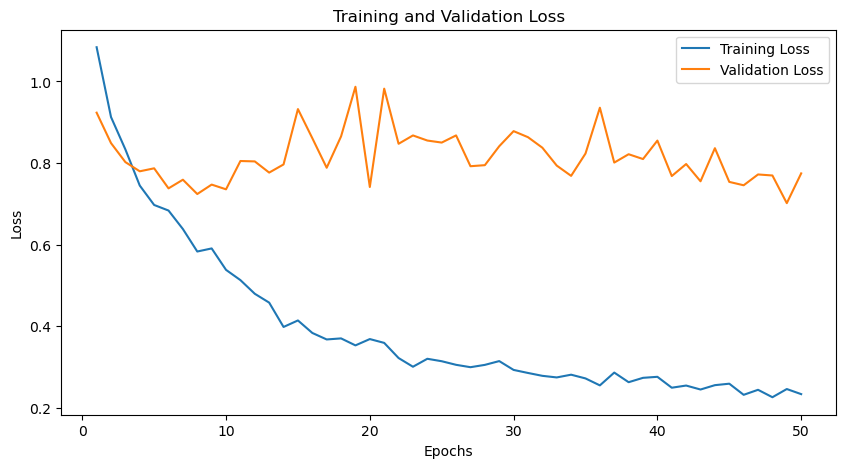

In [176]:
#training code: 
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

X = X_tensor
y = y_tensor
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size =0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

train_set = TensorDataset(X_train, y_train)
val_set = TensorDataset(X_val, y_val)
test_set = TensorDataset(X_test, y_test)

batch_size=64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

input_size = X.shape[1] #adjust to correct
hidden_size1 = 28
hidden_size2 = 14
output_size = 1

model = Perceptron2L(input_size, hidden_size1, hidden_size2, output_size)
def initialize_weights(layer):
    if isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)  # Xavier initialization for weights
        nn.init.zeros_(layer.bias)
model.apply(initialize_weights)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.001)

#Training
num_epochs = 50
train_losses=[]
val_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader: 
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)  # Accumulate total loss

    val_loss /= len(val_loader.dataset)  # Average loss for the epoch
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [177]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Check if GPU (CUDA) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'model' is already trained and 'test_loader' is your test DataLoader

# Move the model to the appropriate device (GPU or CPU)
model.to(device)

# Set the model to evaluation mode (disables dropout, batchnorm)
model.eval()

# Store predictions and true labels for calculating metrics
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation for efficiency
    for inputs, labels in test_loader:
        # Move data to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass: Get model predictions
        outputs = model(inputs)

        # Store the predictions and labels
        all_preds.append(outputs.cpu().numpy())  # Move to CPU for metric calculation
        all_labels.append(labels.cpu().numpy())  # Move to CPU for metric calculation

# Flatten the list of predictions and labels
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

all_preds = (all_preds * y_std) + y_mean
all_labels = (all_labels * y_std) + y_mean

# Combine predictions and labels side by side
comparison = np.column_stack((all_preds, all_labels))

rmse = np.sqrt(mean_squared_error(all_labels, all_preds))
print(f"Test RMSE: {rmse:.4f}")

r2 = r2_score(all_labels, all_preds)
print(f"R^2: {r2:.4f}")

# Print the combined array
print("Predictions vs True Labels:")
print("Prediction\tTrue Label")
for pred, label in comparison:
    print(f"{pred:.4f}\t\t{label:.4f}")



Test RMSE: 267.1654
R^2: 0.4613
Predictions vs True Labels:
Prediction	True Label
16.3103		4.2154
16.3011		0.1636
16.3011		0.0238
16.3011		0.1926
16.3012		0.0800
16.3011		0.5776
16.3014		3.0590
16.3012		10.9052
16.3011		0.0540
16.3011		0.4098
16.3011		12.7896
16.3011		0.2468
16.3016		1.9898
16.3011		29.6580
16.3014		0.4212
16.3011		12.3977
16.3011		1.2543
16.3011		0.1287
16.3030		0.0287
16.3011		0.9474
16.3011		3.3254
16.3011		0.2857
16.3030		10.9052
16.3011		1.7654
16.3013		0.1951
16.3011		0.0753
16.3011		0.0654
16.3012		0.0270
16.3011		1.6001
16.3015		3.2020
16.3116		0.3131
16.3011		0.0516
16.3011		2.9777
628.9969		69.7828
16.3014		0.0280
16.3011		0.1873
16.3023		0.0146
16.3011		0.5866
16.3019		0.0131
16.3051		0.4203
16.6799		2.2203
16.3011		1.3370
16.3014		1.6188
16.4417		0.1032
16.3011		0.0810
16.3012		0.2861
16.3032		0.3141
18.3700		3.6358
16.3055		0.2912
16.3157		14.6431
16.3017		0.2590
16.3011		0.4317
16.3090		5.7559
16.3351		0.7153
16.3013		0.3131
16.3088		0.5393
16.3011		0.084

In [179]:
np.mean(all_labels)

15.236512